In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
from one.api import ONE
one = ONE(mode='remote')

In [74]:
# Find all sessions with wheel position data using one.search
sess = list(one.search(project='brainwide', task_protocol='ephys', datasets='_ibl_wheel.position.npy'))
print(len(sess))
eid = sess[480]

485


In [75]:
# one.get_details(eid)
# one.list_datasets(eid=eid, query_type='remote')

In [76]:
# load an aggregate (group)
subject = 'SWC_043'
subject_trials = one.load_aggregate('subjects', subject, '_ibl_subjectTrials.table')

In [77]:
# import session loader
from brainbox.io.one import SessionLoader

In [78]:
# instantiate session loader
sl = SessionLoader(one=one, eid=eid)

In [79]:
# Load in trials data
sl.load_trials()

In [80]:
df = sl.trials

In [81]:
df.columns

Index(['stimOff_times', 'goCueTrigger_times', 'contrastLeft', 'feedbackType',
       'goCue_times', 'rewardVolume', 'feedback_times', 'firstMovement_times',
       'choice', 'contrastRight', 'stimOn_times', 'response_times',
       'probabilityLeft', 'intervals_0', 'intervals_1'],
      dtype='object')

In [82]:
df[['contrastLeft', 'contrastRight', 'choice', 'feedbackType']].head()
df[['goCue_times', 'stimOn_times', 'response_times', 'feedback_times']].head()

,goCue_times,stimOn_times,response_times,feedback_times
0,263.147867,263.146933,298.976548,298.976567
1,301.853700,301.852800,302.264579,302.264600
2,307.564367,307.563233,307.832244,307.832233
3,313.381000,313.379867,313.691905,313.692667
4,317.320333,317.319400,317.784543,317.785300


In [83]:
np.sort(df['contrastLeft'].unique())

array([0.    , 0.0625, 0.125 , 0.25  , 1.    ,    nan])

In [84]:
prob_left = df['probabilityLeft']

Text(0, 0.5, 'probability')

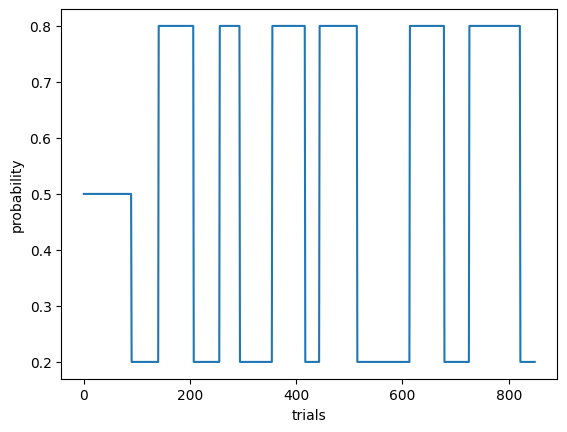

In [85]:
plt.plot(prob_left)
plt.xlabel('trials')
plt.ylabel('probability')

In [86]:
sl.load_wheel()

In [87]:
wheel_df = sl.wheel
wheel_df

,times,position,velocity,acceleration
0,1.597700,0.001534,0.000000,0.000000
1,1.598700,0.001517,-0.018902,-18.902266
2,1.599700,0.001499,-0.018869,0.032826
3,1.600700,0.001482,-0.018820,0.049762
4,1.601700,0.001464,-0.018755,0.064603
...,...,...,...,...
4647171,4648.768555,698.133057,0.000540,-0.092102
4647172,4648.769531,698.133057,0.000458,-0.082681
4647173,4648.770508,698.133057,0.000384,-0.073577
4647174,4648.771484,698.133057,0.000319,-0.064877


Average reaction time for stimulus on
Left: 0.6317719374101046
Right: 0.7673141311225427

Average reaction time on Left overall: 0.6318

Average reaction time on Right overall: 0.7673


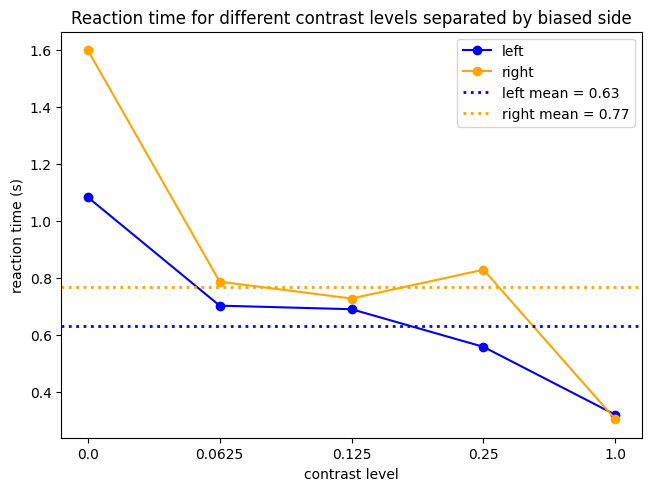

In [88]:

# Finding the reaction time
# Load in trials data
trials = one.load_object(eid, 'trials')

# Convert the trials dict to a pandas dataframe
trials_df = trials.to_df()

# Define reaction time as the time when the visual stimulus first appears and first movement time
reaction_time = trials['firstMovement_times'] - trials['stimOn_times']

# Evaluate reaction time across different trial types
# Compare reaction time for left vs right trials
left_trial_idx = ~np.isnan(trials['contrastLeft'])
right_trial_idx = ~np.isnan(trials['contrastRight'])
left_reaction_time = np.nanmean(reaction_time[left_trial_idx])
right_reaction_time = np.nanmean(reaction_time[right_trial_idx])
print(f'Average reaction time for stimulus on')
print(f'Left: {left_reaction_time}')
print(f'Right: {right_reaction_time}')

# check that the length of nan contrastLeft columns is the same as nonnan contrastRight columns
tot = trials_df.shape[0]
# print(np.sum(left_trial_idx)== tot-np.sum(right_trial_idx))

# compare reaction time for the magnitude of contrast for left and right separately
contrast_levels = np.sort(trials_df['contrastRight'].unique())
contrast_levels = contrast_levels[:5]
# contrast_levels = [0, 0.0625, 0.125, 0.25, 1]

# reaction time for each contrast level on the left
print(f'\nAverage reaction time on Left overall: {left_reaction_time:.4f}')
contrast_left_reaction_times = []
for i in range(len(contrast_levels)):
    contrast = contrast_levels[i]
    trial_idx = trials_df[trials_df['contrastLeft']==contrast].index
    left_reaction = np.nanmean(reaction_time[trial_idx])
    contrast_left_reaction_times.append(left_reaction)
    # print(f'Average reaction time for contrast level {contrast_levels[i]} is {left_reaction:.4f}.')

# reaction time for each contrast level on the right
contrast_right_reaction_times = []
print(f'\nAverage reaction time on Right overall: {right_reaction_time:.4f}')
for i in range(len(contrast_levels)):
    contrast = contrast_levels[i]
    trial_idx = trials_df[trials_df['contrastRight']==contrast].index
    right_reaction = np.nanmean(reaction_time[trial_idx])
    contrast_right_reaction_times.append(right_reaction)
    # print(f'Average reaction time for contrast level {contrast_levels[i]} is {right_reaction:.4f}.')

# plot the reaction time across contrast levels on left and right
fig, ax = plt.subplots(layout='constrained')
ax.plot(range(len(contrast_levels)), contrast_left_reaction_times, label='left', marker='o', color='blue')  # plot as if 0, 1, 2... are the x axis values
ax.plot(range(len(contrast_levels)), contrast_right_reaction_times, label='right', marker='o', color='orange')
plt.xticks(range(len(contrast_levels)), contrast_levels) # but label them with the contrast levels as if categorical
ax.set_xlabel('contrast level')
ax.set_ylabel('reaction time (s)')
ax.set_title('Reaction time for different contrast levels separated by biased side')
plt.axhline(y=left_reaction_time, color='blue', linestyle=':', linewidth=2, label=f'left mean = {left_reaction_time:.2f}')
plt.axhline(y=right_reaction_time, color='orange', linestyle=':', linewidth=2, label=f'right mean = {right_reaction_time:.2f}')
plt.legend()
plt.show()


In [89]:
# Compare reaction time for correct vs incorrect trials
correct_trial_idx = trials_df['feedbackType'] == 1
incorrect_trial_idx = trials_df['feedbackType'] == -1
correct_reaction_time = np.nanmean(reaction_time[correct_trial_idx])
incorrect_reaction_time = np.nanmean(reaction_time[incorrect_trial_idx])
print(f'\nAverage reaction time for trials that were')
print(f'Correct: {correct_reaction_time}')
print(f'Incorrect: {incorrect_reaction_time}')


Average reaction time for trials that were
Correct: 0.6095257215597006
Incorrect: 1.4420450755543721


### Class with functions for calculating reaction time across a session

In [90]:
class ReactionTime:
    """
    Computes the reaction times for any session. 

    Constructor params:
    reaction_type: defines the way to compute reaction time as either the difference between stimulus onset and first movement time (0)
    or the difference between stimulus onset and response time (1). 
    
    eid: the eid of the session. 
    
    Methods: 
    avg_reaction_time(self): computes and returns the average reaction time for all trials, and separated by left and right trials. 

    reaction_time_with_contrast(self, contrast_level, side=None): computes and returns the average reaction time for the specified 
    contrast level, where the contrast level must be a value in [0, 0.0625, 0.125, 0.25, 1]. 

    reaction_time_with_reward(self, reward): computes and returns the reaction time by the specified type of reward (rewarded or not). 
    Pass in reward=1 for rewarded trials and reward=0 for non-rewarded trials.


    """
    def __init__(self, reaction_type, eid):
        self.eid = eid  # Instance variable
        
        # load trial data
        trials = one.load_object(eid, 'trials')
        trials_df = trials.to_df()
        self.trials = trials_df  # make only the df accessible
        
        if reaction_type == 0:
            self.reaction_time = self.trials['firstMovement_times'] - self.trials['stimOn_times']
        elif reaction_type == 1:
            self.reaction_time = self.trials['firstMovement_times'] - self.trials['stimOn_times']
        else: 
            ValueError("reaction_type must be a value 0 or 1.")

    def avg_reaction_time(self):
        avg_reaction_time = np.nanmean(reaction_time)
        left_trial_idx = ~np.isnan(self.trials['contrastLeft'])
        right_trial_idx = ~np.isnan(self.trials['contrastRight'])
        left_reaction_time = np.nanmean(reaction_time[left_trial_idx])
        right_reaction_time = np.nanmean(reaction_time[right_trial_idx])
        print(f'Average reaction time for all trials: {avg_reaction_time:.4f}')
        print(f'Average reaction time for stimulus on')
        print(f'Left: {left_reaction_time}')
        print(f'Right: {right_reaction_time}')

    def reaction_time_with_contrast(self, contrast_level, side=None):
        contrast_levels = [0, 0.0625, 0.125, 0.25, 1]
        assert contrast_level in contrast_levels
        if side!= None:
            assert side in ['left', 'right']
            if side == 'left':
                trial_idx = self.trials[(self.trials['contrastLeft']==contrast)].index
                result = np.nanmean(reaction_time[trial_idx])
                print(f'\nAverage reaction time on {side} side for contrast level {contrast_level} is {result:.4f}.')
            else: 
                trial_idx = self.trials[(self.trials['contrastRight']==contrast)].index
                result = np.nanmean(reaction_time[trial_idx])
                print(f'\nAverage reaction time on {side} side for contrast level {contrast_level} is {result:.4f}.')
        else:
            trial_idx = self.trials[(self.trials['contrastLeft']==contrast) | (self.trials['contrastRight']==contrast)].index
            result = np.nanmean(reaction_time[trial_idx])
            print(f'\nAverage reaction time for contrast level {contrast_level} is {result:.4f}.')
    
    def reaction_time_with_reward(self, reward):
        assert reward in [1, 0]
        if reward==1: 
            correct_trial_idx = self.trials['feedbackType'] == 1
            correct_reaction_time = np.nanmean(reaction_time[correct_trial_idx])
            print(f'\nAverage reaction time for trials that were correct: {correct_reaction_time:.4f}')
        else: 
            incorrect_trial_idx = trials_df['feedbackType'] == -1
            incorrect_reaction_time = np.nanmean(reaction_time[incorrect_trial_idx])
            print(f'\nAverage reaction time for trials that were incorrect: {incorrect_reaction_time:.4f}')

In [91]:
rt = ReactionTime(reaction_type = 1, eid=eid)
rt.avg_reaction_time()
rt.reaction_time_with_contrast(contrast_level=1, side='right')
rt.reaction_time_with_reward(reward=1)

Average reaction time for all trials: 0.6957
Average reaction time for stimulus on
Left: 0.6317719374101046
Right: 0.7673141311225427

Average reaction time on right side for contrast level 1 is 0.3025.

Average reaction time for trials that were correct: 0.6095


Text(0, 0.5, 'Reaction time (s)')

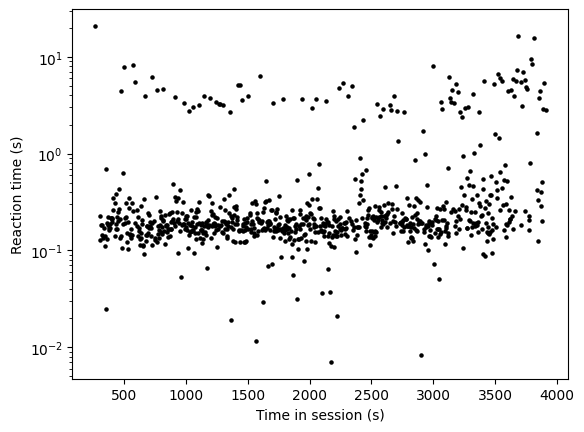

In [92]:
# 5. Make plot of reaction time across session
fig, ax = plt.subplots()
ax.scatter(trials['stimOn_times'], reaction_time, c='k', s=5)
ax.set_yscale("log")  # set y axis to log scale
ax.set_xlabel('Time in session (s)')
ax.set_ylabel('Reaction time (s)')

### PSTH for wheel movement around stimOn times

In [93]:
# PSTH for wheel velocity around stimOn times, comparison left and right sides. 

# Find times when first move is detected
events = np.array(sl.trials['stimOn_times'])

from brainbox.singlecell import bin_spikes
# Compute raster of wheel in 0.05s bins between 0.5s before the first move is detected to 1s after the first move is detected
bin_size = 0.05
pre_time = 0.2
post_time = 0.5
wheel_raster, times = bin_spikes(sl.wheel['times'], events, pre_time=pre_time, post_time=post_time, 
                                 bin_size=bin_size, weights=sl.wheel['velocity'])
# events

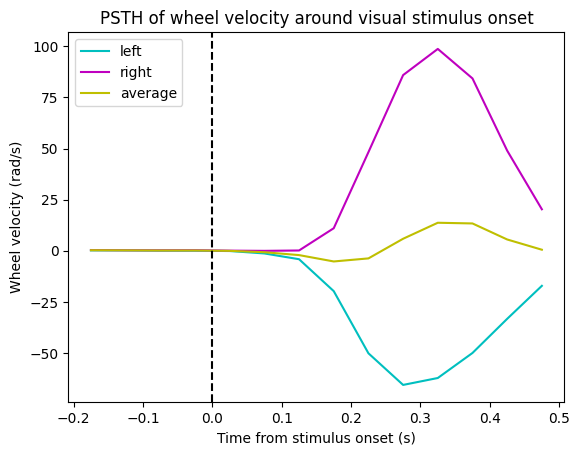

In [94]:
# separate by left and right trials
left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])
wheel_psth_left = np.nanmean(wheel_raster[left_idx], axis=0)
wheel_psth_right = np.nanmean(wheel_raster[right_idx], axis=0)

# for all trials, not separated by left or right
psth_avg = np.mean(wheel_raster, axis=0) 

# Plot the psths
fig, axs = plt.subplots(gridspec_kw={'wspace': 0.5})
axs.plot(times, wheel_psth_left, c='c')
axs.plot(times, wheel_psth_right, c='m')
axs.plot(times, psth_avg, c='y', label='average')
axs.legend(['left', 'right', 'average'], )
axs.axvline(0, c='k', linestyle='--')
axs.set_xlabel('Time from stimulus onset (s)')
axs.set_ylabel('Wheel velocity (rad/s)')
plt.title('PSTH of wheel velocity around visual stimulus onset')
plt.show()

In [95]:
# compare PSTH across contrast levels for just left side
left_trials = trials_df[left_trial_idx]

psth_dict = {}

for level in contrast_levels:
    idx = np.where(left_trials['contrastLeft'] == level)[0]  # trials for this difficulty
    if len(idx) == 0:
        continue  # skip if no trials of this level

    bin_size = 0.025
    pre_time = 0.25
    post_time = 0.75

    wheel_raster, tscale = bin_spikes(
        sl.wheel['times'],
        events[idx],  # only trials for this difficulty
        pre_time=pre_time,
        post_time=post_time,
        bin_size=bin_size,
        weights=sl.wheel['velocity']  
    )

    psth = wheel_raster.mean(axis=0)
    psth_dict[level] = psth  # store for this level

# formatted for printing
np.set_printoptions(legacy='1.25')
psth_dict

{0.0: array([ 0.18388639,  0.11942747,  0.07493592,  0.12584331,  0.14765201,
         0.12544484,  0.12855137,  0.10652155,  0.10682872,  0.09274178,
        -0.1270525 , -0.67112917, -1.24455518, -1.58660378, -1.86318417,
        -2.19000649, -2.31728242, -3.04465214, -5.11578387, -4.64644622,
        -0.61648528,  5.99499462, 12.18949923, 15.94044623, 16.81228837,
        13.72865046,  7.20811494,  0.29679256, -4.74089582, -8.84138173,
        -9.91860679, -6.39054837, -0.56530935,  4.90136485,  6.96791392,
         7.09191787,  4.77772394, -0.08512708, -4.17239813, -5.48777991]),
 0.0625: array([ 0.06253213,  0.10788984,  0.17101494,  0.10081204,  0.09950349,
         0.06046872,  0.05470889,  0.09909766,  0.13113906,  0.05484144,
        -0.12315085, -0.33060603, -0.59788708, -0.74286662, -1.17653371,
        -2.28007248, -3.77695699, -4.44162396, -2.01777555,  3.6340094 ,
         9.8964122 , 12.94590535, 12.58622095, 11.03369894,  7.62784608,
         3.45283627,  0.62639231, -1

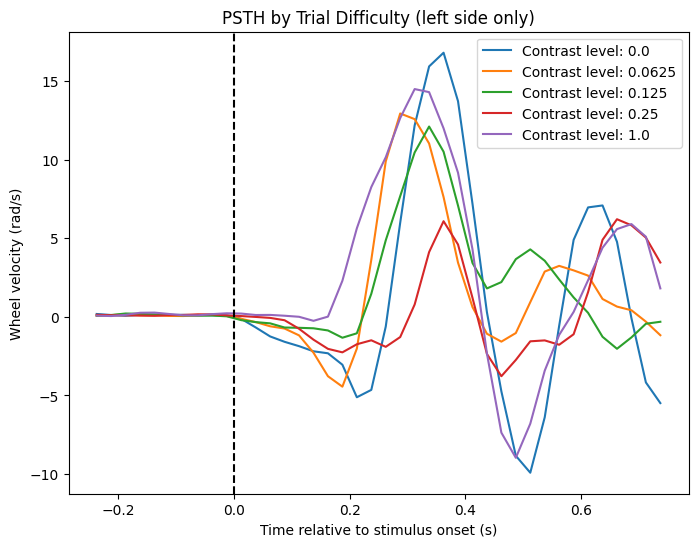

In [96]:
plt.figure(figsize=(8, 6))
for level, psth in psth_dict.items():
    plt.plot(tscale, psth, label=f'Contrast level: {level}')

plt.xlabel('Time relative to stimulus onset (s)')
plt.ylabel('Wheel velocity (rad/s)')
plt.title('PSTH by Trial Difficulty (left side only)')
plt.axvline(0, c='k', linestyle='--')
plt.legend()
plt.show()

In [97]:
# extract low contrast trials
low_contrast_trials = trials_df[(trials_df['contrastLeft']==0)|(trials_df['contrastRight']==0)]
# low_contrast_trials

In [98]:
# PSTH for different probabilities, but only for low contrast trials

probs = np.unique(low_contrast_trials['probabilityLeft'])

psth_probs = {}

for prob in probs:
    idx = np.where(low_contrast_trials['probabilityLeft'] == prob)[0]  # trials for this probability
    if len(idx) == 0:
        continue  # skip if no trials of this probability

    bin_size = 0.01
    pre_time = 0.5
    post_time = 1.25

    wheel_raster, tscale = bin_spikes(
        sl.wheel['times'],
        events[idx],  # only trials for this difficulty
        pre_time=pre_time,
        post_time=post_time,
        bin_size=bin_size,
        weights=sl.wheel['velocity']  
    )

    psth = wheel_raster.mean(axis=0)  # first dimension is trials, second dimension is time (one number for each bin)
    psth_probs[prob] = psth  # store for this level

# formatted for printing
np.set_printoptions(legacy='1.25')
# psth_probs


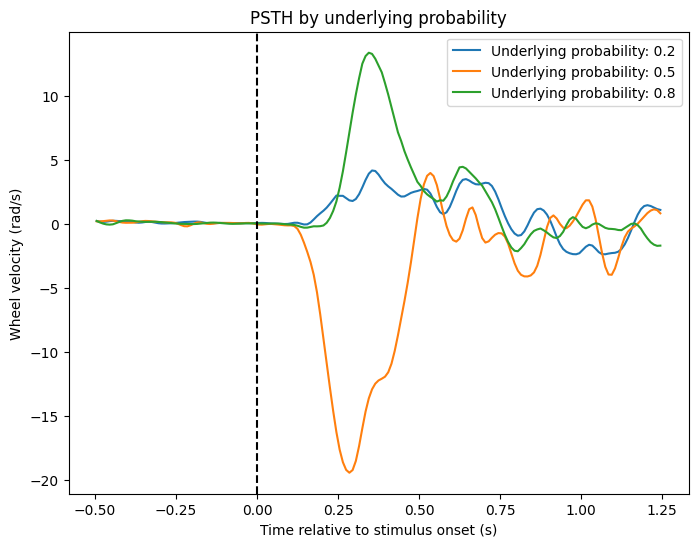

In [99]:
# plot psth
plt.figure(figsize=(8, 6))
for prob, psth in psth_probs.items():
    plt.plot(tscale, psth, label=f'Underlying probability: {prob}')

plt.xlabel('Time relative to stimulus onset (s)')
plt.ylabel('Wheel velocity (rad/s)')
plt.title('PSTH by underlying probability')
plt.axvline(0, c='k', linestyle='--')
plt.legend()
plt.show()